1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 1.0000 - loss: 0.2456
Accuracy on XOR: 100.00%


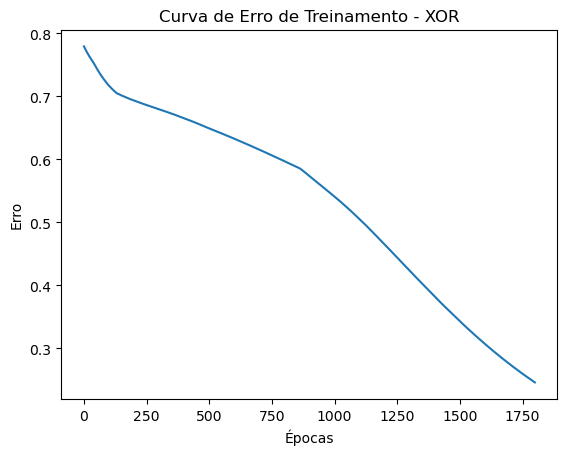

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Dados de treinamento para a função XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Construção do modelo MLP
model_xor = Sequential()
model_xor.add(Dense(4, input_dim=2, activation='relu'))
model_xor.add(Dense(1, activation='sigmoid'))
model_xor.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Treinamento do modelo
history_xor = model_xor.fit(X, y, epochs=1800, verbose=0)

# Avaliação do modelo
_, accuracy = model_xor.evaluate(X, y)
print(f"Accuracy on XOR: {accuracy*100:.2f}%")

# Plotagem da curva de treinamento
plt.plot(history_xor.history['loss'])
plt.title('Curva de Erro de Treinamento - XOR')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


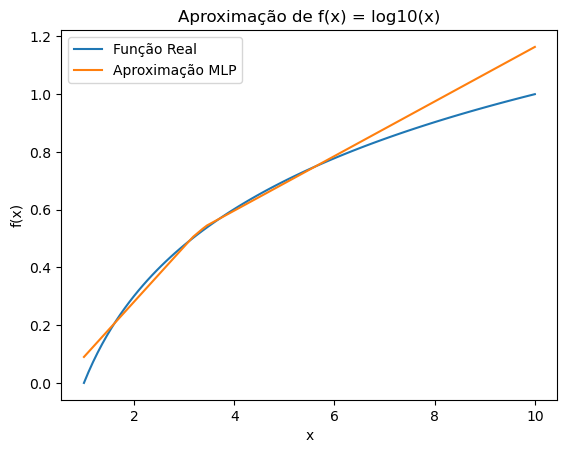

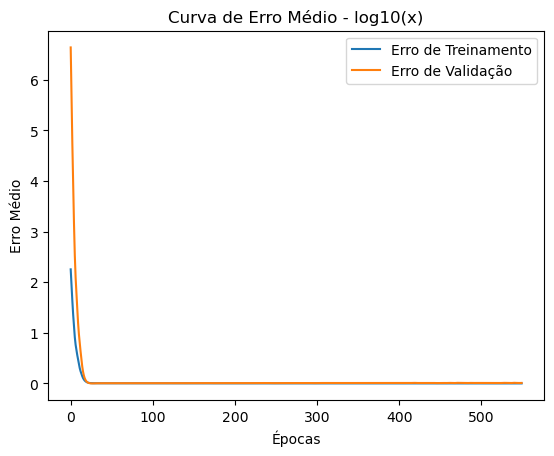

In [19]:
# Função f(x) = log10(x)
x_values_log = np.linspace(1, 10, 100)
y_values_log = np.log10(x_values_log)

x_train_log, y_train_log = x_values_log[:65], y_values_log[:65]
x_val_log, y_val_log = x_values_log[65:], y_values_log[65:]

model_log = Sequential()
model_log.add(Dense(12, input_dim=1, activation='relu'))
model_log.add(Dense(8, input_dim=1, activation='relu'))
model_log.add(Dense(4, input_dim=1, activation='relu'))
model_log.add(Dense(1))
model_log.compile(loss='mse', optimizer=Adam())

history_log = model_log.fit(x_train_log, y_train_log, validation_data=(x_val_log, y_val_log), epochs=550, verbose=0)
y_pred_log = model_log.predict(x_values_log)

plt.plot(x_values_log, y_values_log, label='Função Real')
plt.plot(x_values_log, y_pred_log, label='Aproximação MLP')
plt.title('Aproximação de f(x) = log10(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

plt.plot(history_log.history['loss'], label='Erro de Treinamento')
plt.plot(history_log.history['val_loss'], label='Erro de Validação')
plt.title('Curva de Erro Médio - log10(x)')
plt.xlabel('Épocas')
plt.ylabel('Erro Médio')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


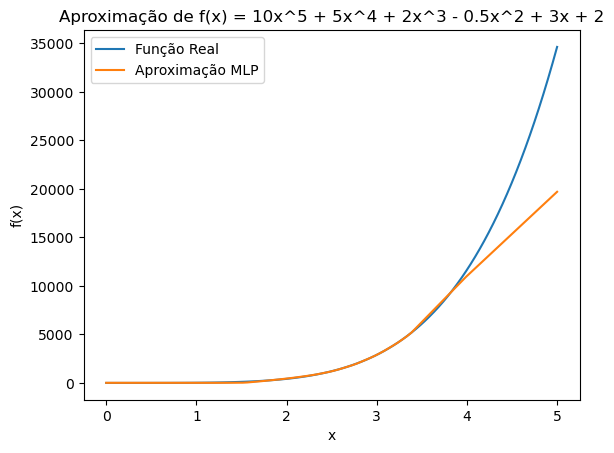

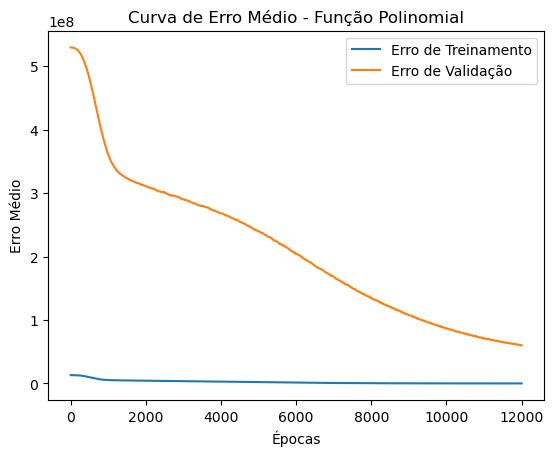

In [31]:
# Geração dos dados
x_values_poly = np.linspace(0, 5, 100)
y_values_poly = 10*x_values_poly**5 + 5*x_values_poly**4 + 2*x_values_poly**3 - 0.5*x_values_poly**2 + 3*x_values_poly + 2

# Divisão dos dados em treino e validação
x_train_poly, y_train_poly = x_values_poly[:80], y_values_poly[:80]
x_val_poly, y_val_poly = x_values_poly[80:], y_values_poly[80:]

# Construção do modelo MLP
model_poly = Sequential()
model_poly.add(Dense(100, input_dim=1, activation='relu'))  # Aumentar a complexidade da rede
model_poly.add(Dense(50, activation='relu'))
model_poly.add(Dense(1))
model_poly.compile(loss='mse', optimizer=Adam(learning_rate=0.0002))  # Ajustar a taxa de aprendizado

# Treinamento do modelo
history_poly = model_poly.fit(x_train_poly, y_train_poly, validation_data=(x_val_poly, y_val_poly), epochs=12000, verbose=0)

# Previsão dos valores
y_pred_poly = model_poly.predict(x_values_poly)

# Plotagem da curva de aproximação
plt.plot(x_values_poly, y_values_poly, label='Função Real')
plt.plot(x_values_poly, y_pred_poly, label='Aproximação MLP')
plt.title('Aproximação de f(x) = 10x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Plotagem das curvas de erro
plt.plot(history_poly.history['loss'], label='Erro de Treinamento')
plt.plot(history_poly.history['val_loss'], label='Erro de Validação')
plt.title('Curva de Erro Médio - Função Polinomial')
plt.xlabel('Épocas')
plt.ylabel('Erro Médio')
plt.legend()
plt.show()
